## 机器学习课程设计任务
1. 使用机器学习以及人工智能应用课程上学习到的机器学习相关理论与算法，使用CIFAR-10数据训练10分类的机器学习模型。
2. 将学习到的模型部署为一个web-demo：在网页中上传新的图像，显示图像，使用学习到的模型进行预测，输出预测的分类类别。

## 机器学习课程设计要求
1. 熟悉并掌握机器学习全过程：数据准备、模型训练和模型选择、模型测试、模型部署
2. 熟悉sklearn、pytorch机器学习库的使用，掌握使用它们构建模型、解决实际问题的步骤和方法。
3. 要求尝试使用三类模型(算法)进行机器学习，其中至少一种使用sklearn库中的算法，每类模型选择最优参数。然后在三类模型中选择最优模型作为最终模型，最终模型在测试集上的准确率作为评分的依据。
4. 要求使用学习的最优模型，基于streamlit将模型部署为一个web-demo，显示新上传的图像并显示分类结果。

说明（如果不做模型部署则对应相应的低档）：
+ 三个模型全部使用sklearn构建 （仅使用传统机器学习算法-对应D档、C档）
+ 分别使用sklearn和pytorch构建模型（结合使用深度学习算法，对应B档、A档）


## 一、数据读取及显示
CIFAR-10是一个包含60000张32x32彩色图片的数据集，其中包括10个类别的图片，每个类别有6000张图片。这个数据集通常用于图像分类任务的训练和测试。

CIFAR-10数据集的10个类别分别是：飞机、汽车、鸟、猫、鹿、狗、青蛙、马、船和卡车。

关于CIFAR-10数据集的更多信息可以在以下链接找到： https://www.cs.toronto.edu/~kriz/cifar.html

In [25]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [ ]:
# 读取CIFAR-10数据集的函数
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [63]:
##读取CIFAR-10数据集
data_batch_1 = unpickle('cifar-10-batches-py/data_batch_1')
data_batch_2 = unpickle('cifar-10-batches-py/data_batch_2')
data_batch_3 = unpickle('cifar-10-batches-py/data_batch_3')
data_batch_4 = unpickle('cifar-10-batches-py/data_batch_4')
data_batch_5 = unpickle('cifar-10-batches-py/data_batch_5')
test_batch = unpickle('cifar-10-batches-py/test_batch')

In [64]:
##整合成所需要的数据
x_train = np.concatenate((data_batch_1[b'data'], data_batch_2[b'data'], data_batch_3[b'data'], data_batch_4[b'data'], data_batch_5[b'data']), axis=0)
y_train = np.concatenate((data_batch_1[b'labels'], data_batch_2[b'labels'], data_batch_3[b'labels'], data_batch_4[b'labels'], data_batch_5[b'labels']), axis=0)
x_test = test_batch[b'data']
y_test = np.array(test_batch[b'labels'])



**注意图像数据的组织：**
+ NCHW 中，C 排列在外层，每个通道内像素紧挨在一起，即 ‘RRRRRRGGGGGGBBBBBB’ 这种形式。 
+ NHWC 格式，C 排列在最内层，多个通道对应空间位置的像素紧挨在一起，即 ‘RGBRGBRGBRGBRGBRGB’

Nvidia cudnn以及pytorch使用NCHW的形式，tensorflow默认NHWC的形式（可以设为 NCHW的形式）

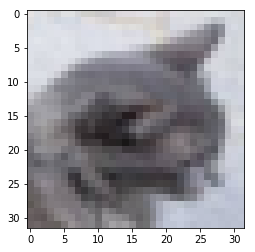

(3072,)
[[ 34  37  44 ...  49  48  58]
 [ 91  95  92 ...  74 121 134]
 [208 198 164 ... 163 165 157]
 ...
 [255 254 254 ...  99  99  97]
 [202 202 202 ...  81  94 101]
 [  4   5   7 ... 233 234 238]]
[6 2 5 6 3 3 8 3 3 0 0 1 7 0 8 3 4 0 2 5 8 6 5 3 9 8 5 3 5 3 8 4 3 9 3 9 6
 6 2 0 0 7 8 2 6 1 6 3 5 1 0 5 7 6 3 4 2 1 6 8 3 9 8 7]


In [68]:

##每个样本3072的数据 是按 （3，32，32）进行组织，即同pytorch中的CHW形式
img=x_train[7].reshape(3,32,32)

plt.imshow(img.transpose((1,2,0))) ## 由于plt显示要求图像是 hwc的格式，所以作一下通道变换，便于显示
plt.show()
print(x_train[7].shape) ##每个图像维度
print(x_train[0:64])    ##每个图像的数据示例，注意是 0-255的整数值。
                        ##机器学习时一般会处理为[0,1]或者[-1,1]范围的数据（归一化处理）
print(y_train[0:64])

## 二、数据预处理

In [ ]:
##根据所选择的机器学习算法或模型的需要进行数据预处理：如将X转换成所需的维度，以及归一化处理等，对Y作one-hot编码等.
##{根据需要，自行完成}

### 机器学习可以使用的数据集

In [66]:

##将训练集分成训练集和验证集
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state={以整数表示的自己的学号}) ##后面用到的函数中如有“random_state”参数同此处理
print('训练集大小:', x_train.shape, y_train.shape)
print('验证集大小:', x_val.shape, y_val.shape)
print('测试集大小:', x_test.shape, y_test.shape)



训练集大小: (40000, 3072) (40000,)
验证集大小: (10000, 3072) (10000,)
测试集大小: (10000, 3072) (10000,)


### 具体类别信息

In [67]:
batches_meta=unpickle('cifar-10-batches-py/batches.meta')

label_names= batches_meta[b'label_names']
label_names= [name.decode('utf-8') for name in label_names]
label_names=np.array(label_names)
print('分类类别数:', label_names.shape[0])
for index in range(0, label_names.shape[0]):
    print(index, label_names[index])

分类类别数: 10
0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


## 三、模型训练与模型选择
每个人自由选择传统机器学习算法（ML课程中讲到的如）或者人工神经网络（深度学习）的模型,可以使用skearn和pytorch库。
+ K近邻、logistic回归、SVM、决策树、随机森林、梯度boosting等方法 
+ MLP，CNN，Resnet等

1.选择不同的学习算法或模型，或者结合多种算法，完成模型的训练 
2.使用验证集选择不同的模型或者不同的参数





In [ ]:

##{自行选择模型，自行编程实现，至少三个模型/算法，选择最优模型}
##{pytorch数据准备：从numpy中创建dataset，自行查阅pytorch文档}

### 模型1的数据准备(按需进行)，模型训练与（模型）参数选择

In [ ]:
##{模型1，在此编程}

### 模型2的数据准备（按需进行），模型训练与（模型）参数选择

In [ ]:
##{模型2，在此编程}

### 模型3的数据准备（按需进行），模型训练与（模型）参数选择





In [ ]:
##{模型3，在此编程}

## 四、模型测试
+ 使用上面的模型在分别在测试集上测试，输出准确率，找到最优模型。
+ 将最优模型保存为文件，方便后续的模型部署。
    sklearn 参考： https://scikit-learn.org/stable/model_persistence.html
    pytroch 参考： https://pytorch.org/tutorials/beginner/saving_loading_models.html
+ 输出最优模型的准确率，作为评分依据之一。

In [ ]:
#{模型测试-自行编程实现}

## 五、模型部署
自行学习streamlit的使用以及编程方法

使用上面训练得到的模型，采用[streamlit](https://streamlit.io/)构建一个web demo, 上传图像，输出图像对应的分类名称。
参考：
+ [Streamlit documentation](https://docs.streamlit.io/)
+ https://stevensmiley1989.medium.com/train-deploy-yolov7-to-streamlit-5a3e925690a9 